Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [128]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

In [129]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 10% GM1

name = '_DPPC_DIPC_chol_352_10GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 20% GM1

name = '_DPPC_DIPC_chol_352_20GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_20/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [130]:
u = mda.Universe( path+fgro, path+fxtc)

In [131]:
sel_all = u.select_atoms("all")

In [132]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [140]:
# select the different species

xmin=0
ymin=0
str_sel= "(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and (name PO4 or name GM1)"
patch = u.select_atoms(str_sel).positions
print(patch)

Lo = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
GM1 = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name GM1").positions
chol = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name ROH").positions


xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[ 46.170002 250.59003   79.87    ]
 [391.26004  315.61002   96.53001 ]
 [226.22002  163.04001   69.11    ]
 ...
 [328.57     341.78003   70.490005]
 [365.15002  264.4       50.39    ]
 [206.44     269.79      61.280003]]
427.46002
427.58002
0.17000002
0.09


In [141]:
# divide the bilayer into 2 leaflets selecting the species you want

Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM1') # 
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

In [142]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N

(225, 3)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.07142857 0.66666667
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.1        0.         0.         0.         0.         0.5
  0.18181818 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.16666667 0.6
  0.26666667 0.         0.        ]
 [0.63636364 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.13333333
  0.6        0.21428571 0.38461538]
 [0.15384615 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.21428571 0.09090909
  0.46153846 0.5        0.44444444]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.21428571 0.8        0.3125
  0.54545455 0.58333333 0.        ]
 [0.         0.         0

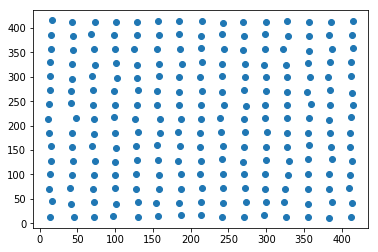

In [143]:
# leaflet 0
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary0 = []
#del Mphi0

Mphi0_Lo = np.zeros((N,N))
Mphi0_Ld = np.zeros((N,N))
Mphi0_GM1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b0=leaflet0.select_atoms(str_sel).centroid().tolist()
        bary0.append(b0)
        
        # composition rates in each box
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        tot0= leaflet0.select_atoms(sel_tot).positions
        n_tot0=len(tot0) # total number of molecules
        
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot0PC= leaflet0.select_atoms(sel_totPC).positions
        n_tot0PC=len(tot0PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo0= leaflet0.select_atoms(sel_Lo).positions
        n_Lo0=len(Lo0) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld0= leaflet0.select_atoms(sel_Ld).positions
        n_Ld0=len(Ld0) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_0= leaflet0.select_atoms(sel_GM1).positions
        n_GM1_0=len(GM1_0) # number of GM1 molecules
        
        
        phi0_Lo=n_Lo0/n_tot0PC
        phi0_Ld=n_Ld0/n_tot0PC
        phi0_GM1=n_GM1_0/n_tot0
        
        Mphi0_Lo[i,j]=phi0_Lo
        Mphi0_Ld[i,j]=phi0_Ld
        Mphi0_GM1[i,j]=phi0_GM1
        
        
bary0=np.array(bary0)

plt.scatter(bary0[:,0],bary0[:,1])

print(np.shape(bary0))
print(Mphi0_GM1)

(225, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


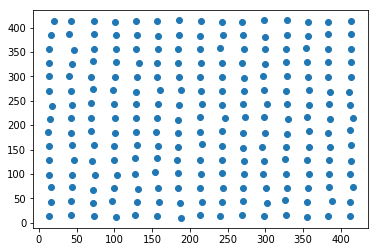

In [144]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))
Mphi1_Ld = np.zeros((N,N))
Mphi1_GM1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(str_sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1= leaflet1.select_atoms(sel_tot).positions
        n_tot1=len(tot1) # total number of molecules
        
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        phi1_Lo=n_Lo1/n_tot1PC
        phi1_Ld=n_Ld1/n_tot1PC
        phi1_GM1=n_GM1_1/n_tot1
        
        Mphi1_Lo[i,j]=phi1_Lo
        Mphi1_Ld[i,j]=phi1_Ld
        Mphi1_GM1[i,j]=phi1_GM1
        
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))
print(Mphi1_GM1)

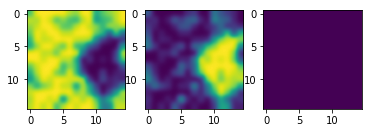

In [145]:
# leaflet 1

f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(Mphi1_Ld, interpolation='gaussian')
ax2.imshow(Mphi1_Lo, interpolation='gaussian')
ax3.imshow(Mphi1_GM1, interpolation='gaussian')

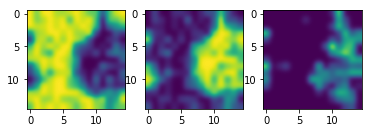

In [146]:
# leaflet 0

f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(Mphi0_Ld, interpolation='gaussian')
ax2.imshow(Mphi0_Lo, interpolation='gaussian')
ax3.imshow(Mphi0_GM1, interpolation='gaussian')

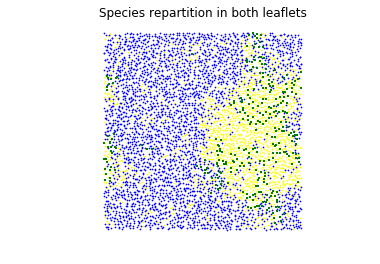

In [147]:
# plot the repartition of the different species

plt.scatter(Lo[:,1]/N, -Lo[:,0]/N, marker='.', c='yellow', s=2)
plt.scatter(Ld[:,1]/N, -Ld[:,0]/N, marker='.', c='b', s=2)
plt.scatter(GM1[:,1]/N, -GM1[:,0]/N, marker='+', c='g', s=4)
#plt.scatter(tot0[:,1]/N, -tot0[:,0]/N, marker='v', c='orange', s=2)
#plt.scatter(Ld0[:,1]/N, -Ld0[:,0]/N, marker='+', c='pink', s=2)
#plt.scatter(chol[:,1]/N, -chol[:,0]/N, marker='.', c='gray', s=2)

plt.axis('equal')
plt.axis('off')
plt.title('Species repartition in both leaflets',fontsize=12)
plt.savefig(path+'species'+name+'.pdf', format='pdf',bbox_inches='tight')

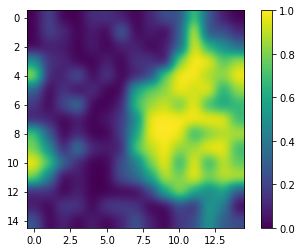

In [148]:
# DPPC / (DPPC+DIPC) leaflet 0
plt.imshow(Mphi0_Lo, interpolation='gaussian')
plt.colorbar()
plt.savefig(path+'compo-upperleaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

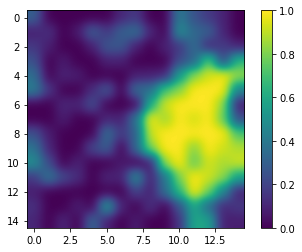

In [149]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()
plt.savefig(path+'compo-lowerleaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

In [150]:
# Choose the leaflet of interest

Mphi_Ld = Mphi0_Ld
Mphi_Lo = Mphi0_Lo
Mphi_GM1 = Mphi0_GM1

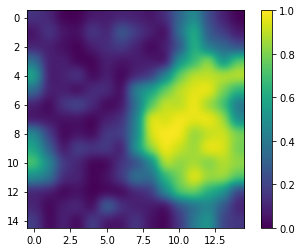

In [151]:
# a voir
Mphi_mean = (Mphi0_Lo+Mphi1_Lo)/2
plt.imshow(Mphi_mean, interpolation='gaussian')
plt.colorbar()

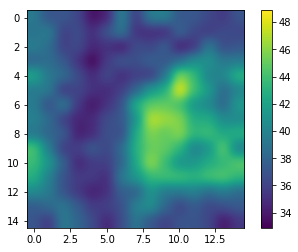

In [152]:
# compute the local thickness = the difference of z between the boxes of the 2 leaflets

bary0.shape=(N,N,3)
bary1.shape=(N,N,3)

diffz=bary0[:,:,2]-bary1[:,:,2]

bary0.shape=(N*N,3)
bary1.shape=(N*N,3)

plt.imshow(diffz, interpolation='gaussian')
plt.colorbar()
#plt.title('Epaisseur de la bicouche',fontsize=12)
plt.savefig(path+'thickness'+name+'.pdf', format='pdf',bbox_inches='tight')

In [153]:
mean_thickness = np.mean(diffz)
max_thickness = np.max(diffz)
min_thickness = np.min(diffz)
print('Mean thickness: %f\n Max thickness: %f\n Min thickness: %f\n' % (mean_thickness, max_thickness, min_thickness))

Mean thickness: 38.810506
 Max thickness: 48.867172
 Min thickness: 32.881008



(-1.5708733956598786, 30.10420644015902, -29.97737813202434, 1.468709363804687)

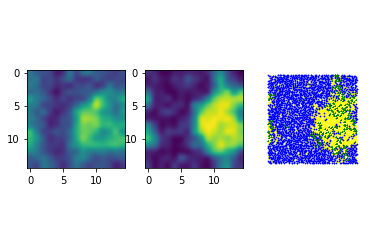

In [154]:
f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(diffz, interpolation='gaussian')
ax2.imshow(Mphi_mean, interpolation='gaussian')

ax3.scatter(Lo[:,1]/N, -Lo[:,0]/N, marker='.', c='yellow', s=2)
ax3.scatter(Ld[:,1]/N, -Ld[:,0]/N, marker='.', c='b', s=2)
ax3.scatter(GM1[:,1]/N, -GM1[:,0]/N, marker='+', c='g', s=1)
ax3.axis('equal')
ax3.axis('off')


In [160]:
# create the needed variable to calculate the local curvature

bary=(bary0+bary1)/2 # median leaflet
print(bary0[0,2])
print(bary1[0,2])
print(bary[0,2])

neigh = [0,0,0,0,0]
h=bary[:,2]

85.49858093261719
46.073848724365234
65.78621482849121


In [161]:
print(h)

[ 65.78621483  55.10435486  43.60928917  33.67103148  28.1488924
  29.35178709  37.18055725  47.17029858  56.51475334  65.19041824
  74.44327927  77.59583092  78.80886269  75.30700302  71.80575752
  63.30641365  54.55071449  47.91112709  38.06262112  32.85258627
  36.48025227  44.35550308  54.3122406   60.21707726  66.90842247
  74.21250725  79.3610878   79.01577377  77.36512184  72.77111626
  69.28834343  58.21458817  48.24083614  41.45150185  37.30625057
  40.5164032   49.53049278  56.13233185  63.05528259  69.71842766
  75.90260124  77.59732246  78.86883926  76.81337547  74.62508011
  73.93826294  62.08245468  49.04615402  40.70833397  38.24050331
  45.89182186  52.99178886  59.75785255  65.912117    71.70642281
  79.17782593  84.48220825  85.30511856  85.53265381  82.95381737
  74.89000511  60.08167267  48.74467087  43.226964    40.84000111
  47.99706841  56.5753231   63.17242622  69.03558922  75.96472549
  83.74357796  91.48621368  93.04821396  91.88446045  84.94304085
  72.962810

In [162]:
# define the function that gives the neighboring

def F_neigh(n) :
    neigh[0] = n
    i=n%N
    j=int(n/N)
    ip1=(i+1)%N
    im1=(i-1)%N
    jp1=(j+1)%N
    jm1=(j-1)%N
    neigh[1] = ip1+N*j
    neigh[2] = im1+N*j
    neigh[3] = i+N*jm1
    neigh[4] = i+N*jp1

In [163]:
# define the function that computes the discrete Laplacian in 2D (with 4 cross neighbors)

def Lap(n) :
    lap = ( h[neigh[4]]+h[neigh[3]]-2*h[neigh[0]] ) / dx**2 + ( h[neigh[1]]+h[neigh[2]]-2*h[neigh[0]] ) / dy**2
    return(lap)

In [164]:
# compute the local curvature in each box of the grid

laplacian = []
for i in range(N*N) :
    F_neigh(i)
    laplacian.append(Lap(i))
    
#print(laplacian)    

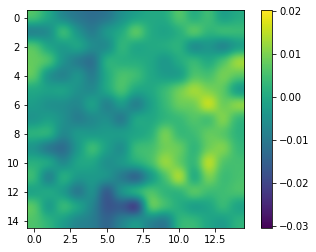

In [165]:
# create a matrix that contains x, y and the local curvature for each box and scatter it

import copy
curv = copy.copy(bary) # then we get x, y and the 3rd column
curv[:,2] = laplacian # then the 3rd column is filled in with the curvature
C = curv[:,2]
C.shape=(N,N) # we create a matrix C that contains the curvature in function of x and y

plt.imshow(-C, interpolation='gaussian')
plt.colorbar()
#plt.title('Local curvature (medial leaflet)',fontsize=12)
plt.savefig(path+'local_curvature'+name+'.pdf', format='pdf',bbox_inches='tight')

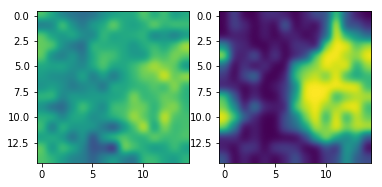

In [166]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(-C, interpolation='gaussian')
ax2.imshow(Mphi0_Lo, interpolation='gaussian')

In [167]:
# correlation up-down leaflet composition
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( Mphi0_Lo[i,j]*Mphi1_Lo[i,j] - np.mean(Mphi0_Lo)*np.mean(Mphi1_Lo) ) / np.std(Mphi0_Lo)/np.std(Mphi1_Lo)
cov_phi = sum/N**2
print(cov_phi)     

0.7874105005637347


In [113]:
# correlation composition - local thickness
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( Mphi_mean[i,j]*diffz[i,j] - np.mean(Mphi_mean)*np.mean(diffz) ) / np.std(Mphi_mean)/np.std(diffz)
cov_e = sum/N**2
print(cov_e)     

0.7675181001163123


In [114]:
# correlation composition - local curvature
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( C[i,j]*Mphi0_Lo[i,j] - np.mean(C)*np.mean(Mphi0_Lo) ) / np.std(C)/np.std(Mphi0_Lo)
cov_c = sum/N**2
print(cov_c)  

-0.4358264452524177


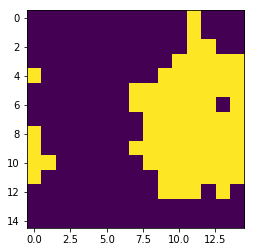

In [115]:
# upper leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi0_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi0_Lo[i,j]>= threshold :
            Mphi0_bin[i,j]=1


#print(Mphi0_bin)          

plt.imshow(Mphi0_bin)

plt.savefig(path+'binary-compo_lower-upper_leaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

In [116]:
# area ratio Lo / tot
area_ratio_Lo = np.sum(Mphi0_bin)/(N*N)
print(area_ratio_Lo)

0.3333333333333333


In [117]:
# Fraction of GM1 molecules located in the Lo phase

M_nb_GM1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # GM1 rates in each box        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_0= leaflet0.select_atoms(sel_GM1).positions
        n_GM1_0=len(GM1_0) # number of GM1 molecules        

        M_nb_GM1[i,j]=n_GM1_0
        
#print(M_nb_GM1)  
nb_GM1_tot = np.sum(M_nb_GM1)
print(nb_GM1_tot)

300.0


In [118]:
# rate of GM1 that are located in the Lo phase

M_GM1_Lo = Mphi0_bin*M_nb_GM1
#print(M_GM1_Lo)
nb_GM1_Lo = np.sum(M_GM1_Lo)
print(nb_GM1_Lo)
rate_GM1_Lo = nb_GM1_Lo/nb_GM1_tot
print(rate_GM1_Lo)

238.0
0.7933333333333333


In [119]:
# Lo boundary detection

Mphi0_bin.shape=(N*N)
M_bound_Lo = np.zeros((N*N))
neigh = [0,0,0,0,0]
for i in range(N*N) :
    F_neigh(i)
    if Mphi0_bin[i]==1 and (Mphi0_bin[i]!=Mphi0_bin[neigh[1]] or Mphi0_bin[i]!=Mphi0_bin[neigh[2]] or Mphi0_bin[i]!=Mphi0_bin[neigh[3]] or Mphi0_bin[i]!=Mphi0_bin[neigh[4]]):
        M_bound_Lo[i]=1
M_bound_Lo.shape=(N,N)
Mphi0_bin.shape=(N,N)
#print(M_bound_Lo)

In [120]:
# Ld boundary detection

Mphi0_bin.shape=(N*N)
M_bound_Ld = np.zeros((N*N))
neigh = [0,0,0,0,0]
for i in range(N*N) :
    F_neigh(i)
    if Mphi0_bin[i]==0 and (Mphi0_bin[i]!=Mphi0_bin[neigh[1]] or Mphi0_bin[i]!=Mphi0_bin[neigh[2]] or Mphi0_bin[i]!=Mphi0_bin[neigh[3]] or Mphi0_bin[i]!=Mphi0_bin[neigh[4]]):
        M_bound_Ld[i]=1
M_bound_Ld.shape=(N,N)
Mphi0_bin.shape=(N,N)
#print(M_bound_Ld)

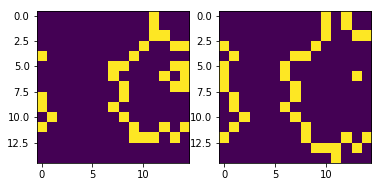

In [121]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(M_bound_Lo)
ax2.imshow(M_bound_Ld)

In [122]:
#M_bound=M_bound_Lo+M_bound_Ld
#plt.imshow(M_bound)

In [123]:
# area ratio Lo boundary / tot
area_ratio_Lobound = np.sum(M_bound_Lo)/(N*N)
print(area_ratio_Lobound)

0.14666666666666667


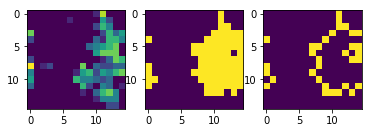

In [124]:
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(M_nb_GM1)
ax2.imshow(Mphi0_bin)
ax3.imshow(M_bound_Lo)
plt.savefig(path+'GM1locations_Lo_boundary'+name+'.pdf', format='pdf',bbox_inches='tight')

In [125]:
# Fraction of GM1 molecules located at the Lo boundary

M_GM1_bound_Lo = M_bound_Lo*M_nb_GM1
#print(M_GM1_bound_Lo)
nb_GM1_bound_Lo = np.sum(M_GM1_bound_Lo)
print(nb_GM1_bound_Lo)
rate_GM1_bound_Lo = nb_GM1_bound_Lo/nb_GM1_tot
print(rate_GM1_bound_Lo)

107.0
0.3566666666666667


In [126]:
M_GM1_Ld = (1-Mphi0_bin)*M_nb_GM1
nb_GM1_Ld = np.sum(M_GM1_Ld)
print(nb_GM1_Ld)
rate_GM1_Ld = nb_GM1_Ld/nb_GM1_tot
print(rate_GM1_Ld)

62.0
0.20666666666666667


In [127]:
# write these results to a file

file = open(path+'correl_coloc'+name+'.txt','w') 
file.write('correlation leaflet up-down: %lf\ncorrelation compo-thickness: %lf\ncorrelation compo-curvature: %lf\nFraction of GM1 molecules located in the Lo phase: %lf\nFraction of GM1 molecules located at the Lo boundary: %lf\nFraction of GM1 molecules located in the Lo phase / area ratio: %lf\nFraction of GM1 molecules located at the Lo boundary / area ratio: %lf' % (cov_phi, cov_e, cov_c, rate_GM1_Lo, rate_GM1_bound_Lo, rate_GM1_Lo/area_ratio_Lo, rate_GM1_bound_Lo/area_ratio_Lobound)) 
file.close() 